In [85]:
import pandas as pd
df = pd.read_csv('train.csv')

print( df.target.value_counts() )
df.head()

0    4342
1    3271
Name: target, dtype: int64


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
raw_tweets = list(df['text'])

raw_tweets[:4]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ']

In [87]:
raw_keywords = list(df['keyword'])

In [88]:
def nan_to_string(array):

    proc_array = []

    for i in range(len(array)):
        proc_array.append( [str(array[i])] )

    return proc_array

In [89]:
import tensorflow as tf

def categorical(raw_array, tokenizer, debug=False):

    def namestr(obj, namespace):
        return [name for name in namespace if namespace[name] is obj]


    seq_array = tokenizer.texts_to_sequences(raw_array)

    cat_array = tf.keras.utils.to_categorical(seq_array)
    cat_array = cat_array[:, 1:]   # cause the [0] value doesnt have anything in the word index


    if debug == True:
        print(f"\ncategorising array --> {namestr(raw_array, globals())[0]}")
        print(f"unique values --> {tokenizer.word_index}")
        for i in range(5):
            print(f"{raw_array[i]} --> { cat_array[i] }")
        print()
        
    return cat_array

In [90]:
proc_keywords = nan_to_string(raw_keywords)

key_tokenizer = tf.keras.preprocessing.text.Tokenizer( lower=False )
key_tokenizer.fit_on_texts(proc_keywords)

cat_keywords = categorical(proc_keywords, key_tokenizer, debug=False)

In [91]:
print(len(cat_keywords))
print(len(cat_keywords[1]))

7613
222


In [92]:
def count_hashtags(array):
    hashtag_array = []
    
    for tweet in array:
        hash_count = 0
        for letter in tweet:
            if letter == '#':
                hash_count = hash_count + 1
        # print(hash_count, tweet, sep=' --> ')
        hashtag_array.append(hash_count)
        # break
        
    return hashtag_array

In [93]:
hashtag_array = count_hashtags(raw_tweets)
hashtag_array[:10]

[1, 0, 0, 1, 2, 3, 2, 0, 0, 0]

In [94]:
def has_link(array):
    link_array = []

    for tweet in array:
        link_pres = 0
        link_split = tweet.split('http:')
        if len(link_split) > 1:
            link_pres = link_pres + 1

        # print(f"{link_pres} --> {link_split}")
        link_array.append(link_pres)
        # break

    return link_array

In [95]:
link_array = has_link(raw_tweets)
link_array[-20:]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]

In [96]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab = 20000 # max number of words to have in our vocabulary
max_seq_length = 15 # max length our sequences will be 

text_vectorizer = TextVectorization(
    max_tokens = max_vocab,
    # standardize="lower_and_strip_punctuation",
    output_mode = "int",
    output_sequence_length = max_seq_length
)

In [97]:
text_vectorizer.adapt(raw_tweets)

vocabulary = text_vectorizer.get_vocabulary()
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [98]:
proc_tweets = text_vectorizer(raw_tweets)

print(proc_tweets[:5])

tf.Tensor(
[[  110  6241    22     2   835     6    19   250   125  1689  5990    70
     40     0     0]
 [  180    42   222   694  9621  9422  1434     0     0     0     0     0
      0     0     0]
 [   40  1739  1685     5  2150     4   663    22   123 11055    18  1759
     41   428   249]
 [ 3475    56  5118  1353   249  1388     4    88     0     0     0     0
      0     0     0]
 [   29    95  1193    19   327    20  9557  2364    26   257    20  1353
  10340    66     3]], shape=(5, 15), dtype=int64)


In [99]:
proc_tweets.shape
train_x = proc_tweets

In [100]:
# checking if the vectorized text is decoded properly

for seq in proc_tweets[0]:
    print(f"{int(seq)} --> {vocabulary[seq]}")

110 --> our
6241 --> deeds
22 --> are
2 --> the
835 --> reason
6 --> of
19 --> this
250 --> earthquake
125 --> may
1689 --> allah
5990 --> forgive
70 --> us
40 --> all
0 --> 
0 --> 


In [101]:
targets = list(df['target'])
targets[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [31]:
# train_x = []

# for i in range(len(proc_tweets)):
#     temp_token_arr = []
#     for seq in proc_tweets[i]:
#         temp_token_arr.append(int(seq))

#     temp = [
#         temp_token_arr
#     ]
#     temp[0].extend(cat_keywords[i])
#     train_x.append(temp[0])
    
#     # if i == 2:
#         # print(temp)

# # train_x[:2]

In [32]:
# train_x = []

# for tweet in proc_tweets:
#     bag = []
#     for word in tweet:
#         bag.append(int(word))
#     train_x.append(bag)

# train_x[:4]

In [102]:
import numpy as np

train_x = np.array(train_x)
train_y = np.array(targets)

train_x[0]
# len(train_x[0])  # 237

array([ 110, 6241,   22,    2,  835,    6,   19,  250,  125, 1689, 5990,
         70,   40,    0,    0])

Getting GloVe embeddings

In [103]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip -q glove.6B.zip

In [104]:
embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [105]:
print(train_x.shape)
print(train_y.shape)

(7613, 15)
(7613,)


In [106]:
embedding_dim = 100
hit = 0
miss = 0
vocab_array = text_vectorizer.get_vocabulary()
embedding_matrix = [0] * max_vocab

# print(embedding_matrix[:5])
# print(vocab_array[:5])

for i in range(max_vocab):
    word = vocab_array[i]
    # print(i, word, sep=' --> ', end=' --> ')

    try: 
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except: 
        embedding_vector = None
        embedding_matrix[i] = [0] * 100
    # print(embedding_vector)

    if embedding_vector is not None: hit = hit + 1
    else: miss = miss + 1

print(f"hits : {hit}\nmisses : {miss}")
print(embedding_matrix[:3])

hits : 10865
misses : 9135
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
   

In [108]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim = max_vocab,
    output_dim = 100,
    embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
    trainable = False,
)

In [121]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

visible = layers.Input( shape=[max_seq_length] )
x = embedding_layer(visible)

# x = layers.Embedding(
#     input_dim = max_vocab,
#     output_dim = 128,
#     # input_length = max_seq_length,
#     input_length = 15,
# )(visible)

# x = layers.GlobalAveragePooling1D()(x)

x = layers.Bidirectional( layers.LSTM(64) )(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(1,activation="sigmoid")(x)

model = Model( inputs=[visible], outputs=[output] )

In [122]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 15)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 15, 100)           2000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                           

In [123]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_x, train_y,
    validation_split=0.2,
    epochs=4,
)


Epoch 1/4
191/191 [==============================] - 10s 27ms/step - loss: 0.4930 - accuracy: 0.7649 - val_loss: 0.4271 - val_accuracy: 0.8201
Epoch 2/4
191/191 [==============================] - 4s 22ms/step - loss: 0.4394 - accuracy: 0.8048 - val_loss: 0.4381 - val_accuracy: 0.8037
Epoch 3/4
191/191 [==============================] - 4s 22ms/step - loss: 0.4128 - accuracy: 0.8172 - val_loss: 0.4255 - val_accuracy: 0.8076
Epoch 4/4
191/191 [==============================] - 4s 22ms/step - loss: 0.3994 - accuracy: 0.8250 - val_loss: 0.4200 - val_accuracy: 0.8102


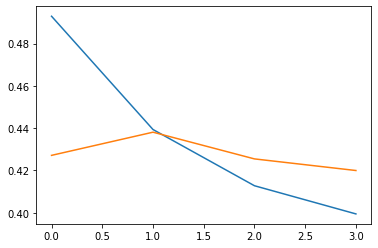

In [124]:
import matplotlib.pyplot as plt

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.show()

In [125]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [126]:
test_tweets = list(test_df['text'])

proc_test = text_vectorizer(test_tweets)
proc_test[:3]

<tf.Tensor: shape=(3, 15), dtype=int64, numpy=
array([[  29,  893,    3, 1910,  122,   85,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 450,   53,  250,    9, 1159, 2754,  592, 1940,  228,    0,    0,
           0,    0,    0,    0],
       [  75,    9,    3,  180,   42,   17,  767, 3034,    1,   22, 6003,
         865,    2,  712,    8]])>

In [127]:
test_hashtag_array = count_hashtags(test_tweets)
test_hashtag_array[:10]

[0, 1, 0, 2, 0, 0, 0, 0, 0, 0]

In [128]:
test_link_array = has_link(test_tweets)
test_link_array[-20:]

[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

In [129]:
test_keywords = list(test_df['keyword'])
proc_test_keywords = nan_to_string(test_keywords)
cat_test_keywords = categorical(proc_test_keywords, key_tokenizer, debug=False)

cat_test_keywords[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32

In [130]:
# test_x = []

# for i in range(len(proc_test)):
#     temp_token_arr = []
#     for seq in proc_test[i]:
#         temp_token_arr.append(int(seq))
        
#     temp = [
#         temp_token_arr
#     ]
#     temp[0].extend(cat_test_keywords[i])
#     test_x.append(temp[0])
    
#     # if i < 1:
#     #     print(temp)

In [ ]:
# test_x = []

# for tweet in proc_test:
#     bag = []
#     for word in tweet:
#         bag.append(int(word))
#     test_x.append(bag)

# test_x[:4]

In [132]:
test_x = proc_test

In [133]:
predictions = model.predict(test_x)

test_targets = []
for i in range(len(predictions)):
    if predictions[i][0]//0.01 > 50:
        test_targets.append(1)
    if predictions[i][0]//0.01 < 50:
        test_targets.append(0)
    if predictions[i][0]//0.01 == 50:
        test_targets.append(0)
    if i < 20:
        print(f"{predictions[i][0]//0.01} % distress --> {test_tweets[i]}")

87.0 % distress --> Just happened a terrible car crash
77.0 % distress --> Heard about #earthquake is different cities, stay safe everyone.
88.0 % distress --> there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all
88.0 % distress --> Apocalypse lighting. #Spokane #wildfires
97.0 % distress --> Typhoon Soudelor kills 28 in China and Taiwan
82.0 % distress --> We're shaking...It's an earthquake
7.0 % distress --> They'd probably still show more life than Arsenal did yesterday, eh? EH?
7.0 % distress --> Hey! How are you?
6.0 % distress --> What a nice hat?
15.0 % distress --> Fuck off!
7.0 % distress --> No I don't like cold!
14.0 % distress --> NOOOOOOOOO! Don't do that!
6.0 % distress --> No don't tell me that!
12.0 % distress --> What if?!
13.0 % distress --> Awesome!
67.0 % distress --> Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU
10.0 % distress --> @sunkxssedharry 

In [134]:
# id = list(test_df['id'])

# submit_dict = {
#     'id': id,
#     'target': test_targets
# }

# submit_df = pd.DataFrame(submit_dict)
# submit_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [135]:
# submit_df.to_csv('submit.csv')